<a href="https://colab.research.google.com/github/omar4646/My_repository/blob/main/Classification_learning_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
positive_points = np.array([(-2, 3), (0, 1), (2, -1)])
negative_points = np.array([(-2, 1), (0, -1), (2, -3)])

In [3]:
positive_points

array([[-2,  3],
       [ 0,  1],
       [ 2, -1]])

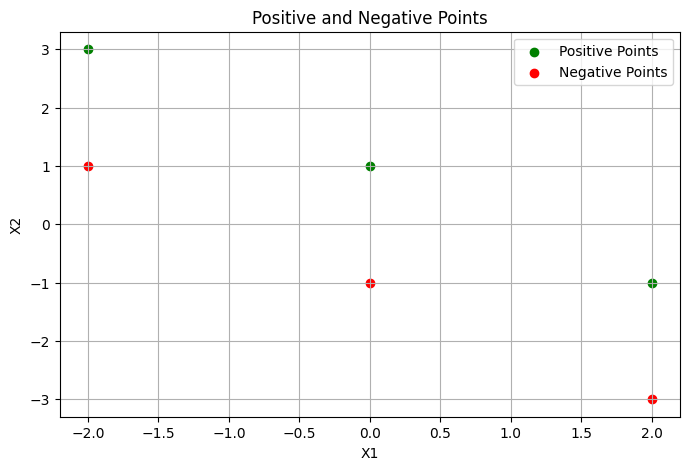

In [6]:
plt.figure(figsize=(8, 5))
plt.scatter(positive_points[:, 0], positive_points[:, 1], color='green', label='Positive Points')
plt.scatter(negative_points[:, 0], negative_points[:, 1], color='red', label='Negative Points')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Positive and Negative Points')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [7]:
X = np.vstack((positive_points, negative_points))
y = np.array([1]*len(positive_points) + [-1]*len(negative_points))

In [9]:
y

array([ 1,  1,  1, -1, -1, -1])

In [21]:
def perceptron(X, y, epochs=100):
  theta = np.zeros(X.shape[1])
  theta0 = 0
  for t in range(epochs):
    for i, x1 in enumerate(X):
      if y[i] * (np.dot(theta, x1) + theta0) <= 0:
        theta += y[i] * x1
        theta0 += y[i]
        plot_decision_boundary(theta, theta0, t+1) # Plot after each update
        break # The perceptron algorithm updates weights and moves to the next epoch
  return theta, theta0

In [22]:
def plot_decision_boundary(theta, theta0, iteration):
  plt.figure(figsize=(8, 5))
  plt.scatter(positive_points[:, 0], positive_points[:, 1], color='green', label='Positive Points')
  plt.scatter(negative_points[:, 0], negative_points[:, 1], color='red', label='Negative Points')

  #Plot decision boundary
  x_values = np.linspace(-3, 3, 2)
  #Check for theta[1] to avoid division by 0 in case of vertical line
  if theta[1] != 0:
    y_values = -(theta[0] * x_values + theta0) / theta[1]
    plt.plot(x_values, y_values, 'b', label=f'Decision Boundary (Iteration {iteration})')
  else:
    x_val = -theta0 / theta[0]
    plt.axvline(x=x_val, color='b', linestyle='--', label=f'Decision Boundary (Iteration {iteration})')

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Decision Boundary')

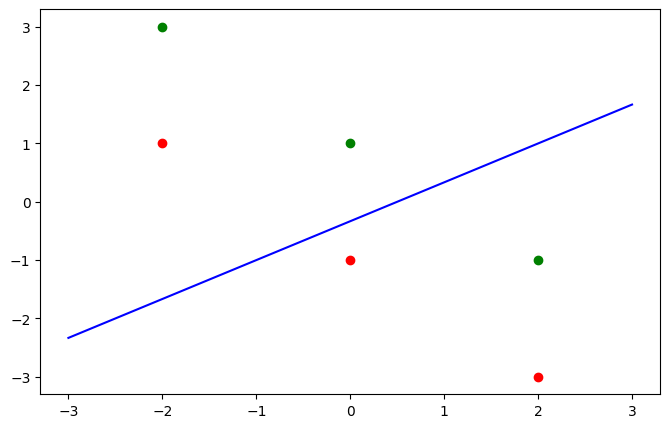

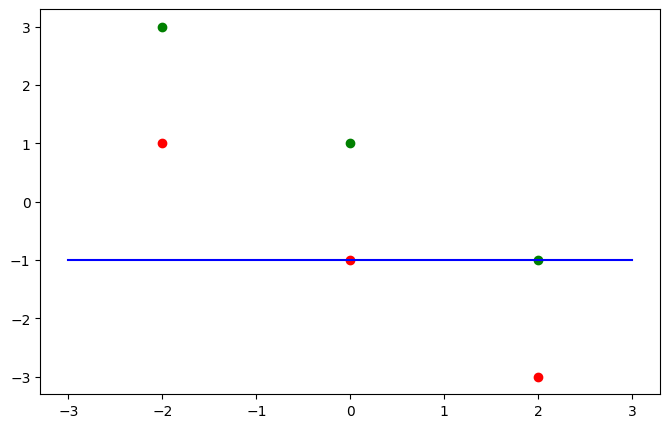

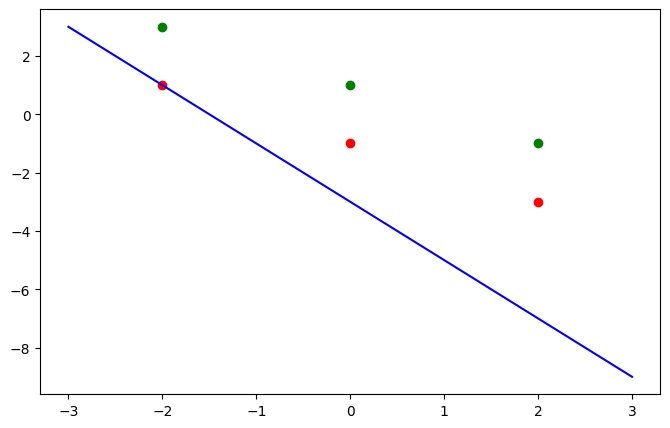

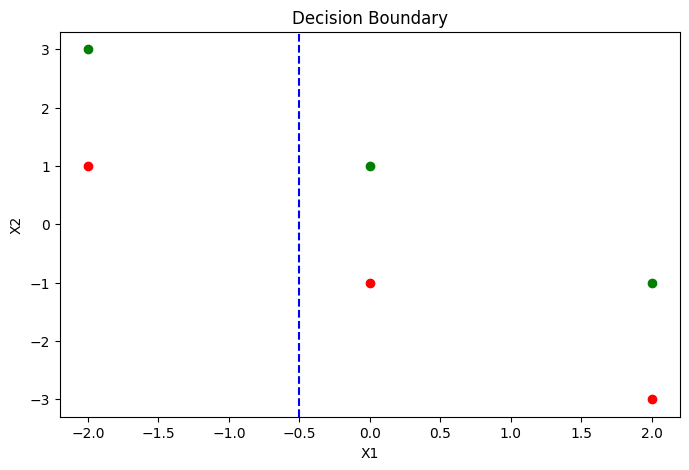

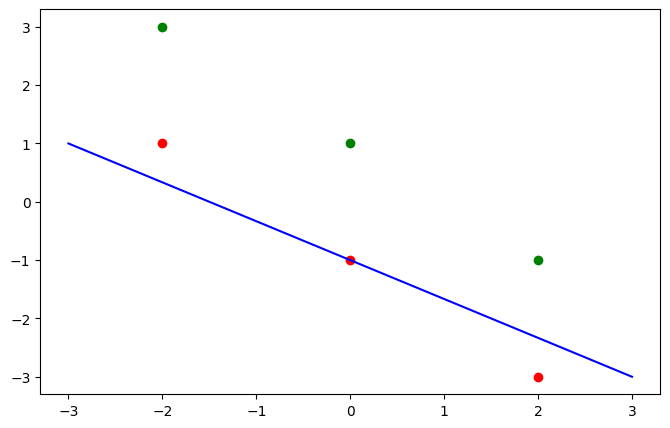

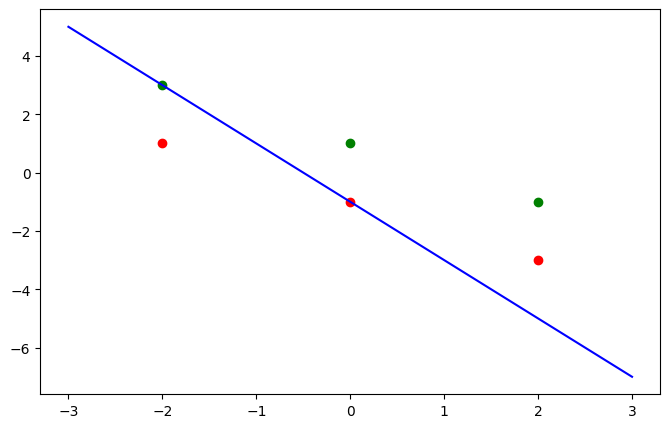

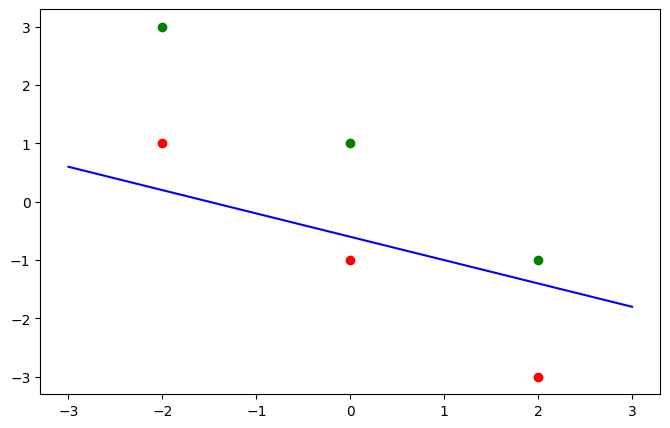

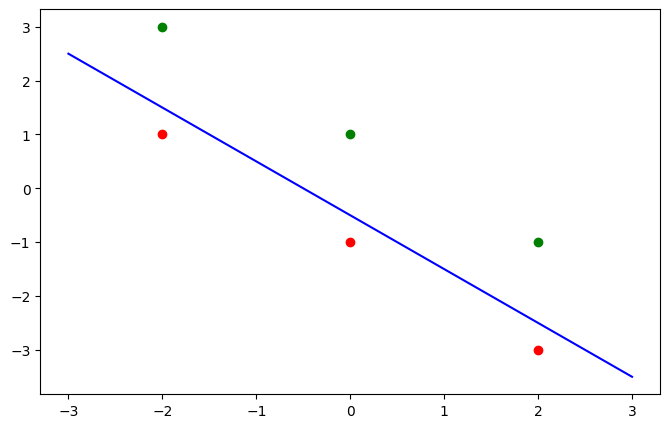

In [23]:
theta_final, theta0_final = perceptron(X, y, 10)

# Random linear classification algorith

In [27]:
np.random.seed(0)

In [29]:
dog_whisker_lenght = np.random.normal(loc=5, scale=1, size=10)
dog_ear_flappines = np.random.normal(loc=8, scale=1, size=10)

cat_whisker_lenght = np.random.normal(loc=8, scale=1, size=10)
cat_ear_flappines = np.random.normal(loc=5, scale=1, size=10)

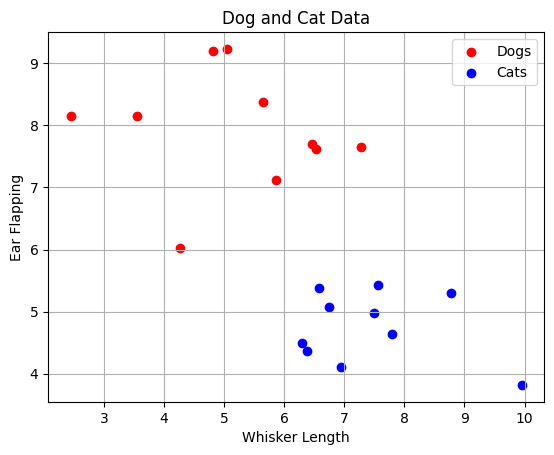

In [30]:
plt.scatter(dog_whisker_lenght, dog_ear_flappines, color='red', label='Dogs')
plt.scatter(cat_whisker_lenght, cat_ear_flappines, color='blue', label='Cats')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flapping')
plt.title('Dog and Cat Data')
plt.legend()
plt.grid(True)
plt.show()

Let's outline a simple random linear classification algorithm. This is a basic conceptual algorithm, not a standard, widely-used one.

**Algorithm: Random Linear Classifier**

1.  **Initialization:**
    *   Initialize a weight vector $\mathbf{w} \in \mathbb{R}^d$ and a bias term $b \in \mathbb{R}$ with random values. These values can be drawn from a standard normal distribution, for example.
    *   $ \mathbf{w} \sim \mathcal{N}(\mathbf{0}, \mathbf{I}) $
    *   $ b \sim \mathcal{N}(0, 1) $

2.  **Classification of a new data point $\mathbf{x}$:**
    *   Calculate the linear combination of the input features and the weights, and add the bias term:
        $ z = \mathbf{w}^T \mathbf{x} + b $
    *   Classify the data point based on the sign of $z$:
        $ \text{predicted class} = \begin{cases} +1 & \text{if } z \ge 0 \\ -1 & \text{if } z < 0 \end{cases} $

This algorithm simply assigns a random decision boundary and uses it for classification. It does not involve any training or learning from the data.

In [50]:
def random_linear_classifier(data_dog, data_cat, k, d):
  best_theta = None
  best_theta0 = None
  best_error = float('inf')

  for _ in range(k):
    theta = np.random.normal(size=d)
    theta0 = np.random.normal()

    error = compute_error(data_dog, data_cat, theta, theta0)
    if error < best_error:
      best_theta = theta
      best_theta0 = theta0
      best_error = error

  return best_theta, best_theta0, best_error

In [51]:
#Compute error
def compute_error(data_dog, data_cat, theta, theta0):
  error = 0
  for x_dog in data_dog:
    if np.dot(x_dog, theta) + theta0 <= 0:
      error += 1
  for x_cat in data_cat:
    if np.dot(x_cat, theta) + theta0 > 0:
      error += 1
  return error

In [52]:
data_dog = np.vstack([dog_whisker_lenght, dog_ear_flappines]).T
data_cat = np.vstack([cat_whisker_lenght, cat_ear_flappines]).T

In [58]:
k = 1000
d = 2
best_theta, best_theta0, best_error = random_linear_classifier(data_dog, data_cat, k, d)

In [59]:
print(best_theta, best_theta0, best_error)

[-1.18468659  0.9606934 ] 1.3290628465396823 0


In [60]:
x_val = np.linspace(2, 10, 100)
y_val = -(best_theta[0] * x_val + best_theta0) / best_theta[1]

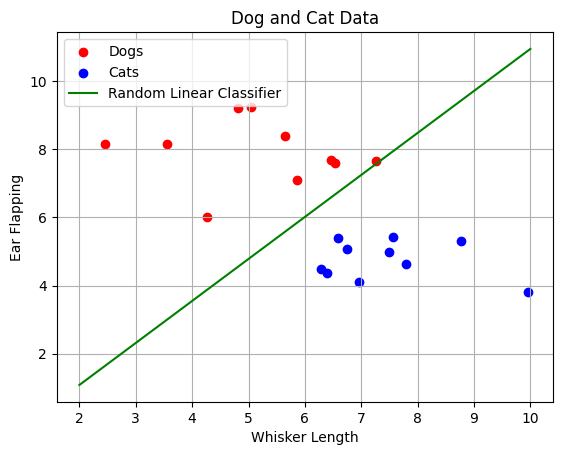

In [61]:
plt.scatter(dog_whisker_lenght, dog_ear_flappines, color='red', label='Dogs')
plt.scatter(cat_whisker_lenght, cat_ear_flappines, color='blue', label='Cats')
plt.plot(x_val, y_val, color='green', label='Random Linear Classifier')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flapping')
plt.title('Dog and Cat Data')
plt.legend()
plt.grid(True)
plt.show()